In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import stop_words
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train.tsv', sep = '\t')
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
df.apply(lambda x: x.nunique())

train_id             1482535
name                 1225273
item_condition_id          5
category_name           1287
brand_name              4809
price                    828
shipping                   2
item_description     1281426
dtype: int64

In [4]:
df.dtypes

train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

In [5]:
df.isnull().sum()

train_id                  0
name                      0
item_condition_id         0
category_name          6327
brand_name           632682
price                     0
shipping                  0
item_description          4
dtype: int64

In [6]:
mean = (df.price.mean())

In [7]:
df['category_name'] = df['category_name'].fillna(mean)
df['brand_name'] = df['brand_name'].fillna(mean)

In [8]:
df.shape

(1482535, 8)

In [9]:
df.dropna(axis=0, how='any', subset=['item_description'], inplace = True)

In [10]:
df.shape

(1482531, 8)

In [11]:
df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
dtype: int64

In [12]:
def split_cat(text):
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

In [13]:
#train
# splitting the raw category into main and sub sub categories
df['main_cat'], df['subcat_1'], df['subcat_2'] = \
zip(*df['category_name'].apply(lambda x: split_cat(x)))
# sanity checking the train for new categories
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,26.7375,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,26.7375,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,26.7375,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [14]:
%%time
mean_brand_name = df.groupby(['brand_name'], as_index=False)['price'].mean()
#mean_shipping = df.groupby(['shipping'], as_index=False)['price'].mean()
mean_main_cat = df.groupby(['main_cat'], as_index=False)['price'].mean()
mean_subcat_1 = df.groupby(['subcat_1'], as_index=False)['price'].mean()
mean_subcat_2 = df.groupby(['subcat_2'], as_index=False)['price'].mean()
mean_item_condition_id = df.groupby(['item_condition_id'], as_index=False)['price'].mean()

CPU times: user 1.82 s, sys: 198 ms, total: 2.02 s
Wall time: 4.02 s


In [15]:
%%time
df = df.merge(mean_brand_name, on=['brand_name'], how='left', suffixes=('', 'mean_brand_name'))
#df = df.merge(mean_shipping, on=['shipping'], how='left', suffixes=('', 'mean_shipping'))
df = df.merge(mean_main_cat, on=['main_cat'], how='left', suffixes=('', 'mean_main_cat'))
df = df.merge(mean_subcat_1, on=['subcat_1'], how='left', suffixes=('', 'mean_subcat_1'))
df = df.merge(mean_subcat_2, on=['subcat_2'], how='left', suffixes=('', 'mean_subcat_2'))
df = df.merge(mean_item_condition_id, on=['item_condition_id'], how='left', suffixes=('', 'mean_item_condition_id'))



CPU times: user 5.27 s, sys: 349 ms, total: 5.62 s
Wall time: 11.3 s


In [16]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,subcat_1,subcat_2,pricemean_brand_name,pricemean_main_cat,pricemean_subcat_1,pricemean_subcat_2,pricemean_item_condition_id
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,26.7375,10.0,1,No description yet,Men,Tops,T-shirts,21.133446,34.708614,18.999442,18.352495,26.540789
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,45.021277,35.173922,87.887754,42.913900,26.540789
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,15.047109,28.885554,18.237514,15.659676,26.486967
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,26.7375,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,21.133446,24.536599,21.566301,22.185020,26.486967
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,26.7375,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,21.133446,28.885554,27.501571,25.587509,26.486967


In [17]:
df.isnull().sum()

train_id                       0
name                           0
item_condition_id              0
category_name                  0
brand_name                     0
price                          0
shipping                       0
item_description               0
main_cat                       0
subcat_1                       0
subcat_2                       0
pricemean_brand_name           0
pricemean_main_cat             0
pricemean_subcat_1             0
pricemean_subcat_2             0
pricemean_item_condition_id    0
dtype: int64

In [18]:
df.dtypes

train_id                         int64
name                            object
item_condition_id                int64
category_name                   object
brand_name                      object
price                          float64
shipping                         int64
item_description                object
main_cat                        object
subcat_1                        object
subcat_2                        object
pricemean_brand_name           float64
pricemean_main_cat             float64
pricemean_subcat_1             float64
pricemean_subcat_2             float64
pricemean_item_condition_id    float64
dtype: object

In [19]:
df = df.loc[df['price'] != 0]

In [20]:
df.shape

(1481657, 16)

In [21]:
temp = df.copy()

In [22]:
y = temp['price']

In [23]:
del temp['price']

## Random Model

In [24]:
X_train, X_test, y_train, y_test = train_test_split(temp, y, test_size=0.33, random_state=42)

In [25]:
y_pred_rand = y_train.sample(488947,random_state = 42)

In [26]:
y_pred_rand.reset_index(drop = True, inplace = True)

In [27]:
y_test_rand = y_test.copy()

In [28]:
y_test_rand.shape

(488947,)

In [29]:
y_test_rand.reset_index(drop = True, inplace = True)

In [30]:
def rmsle(y_test, y_pred):
    assert len(y_test) == len(y_pred)
    return np.sqrt(np.mean(np.power(np.log1p(y_test)-np.log1p(y_pred), 2)))

In [31]:
def symm_mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean((np.abs(y_true - y_pred))/(np.abs(y_true) + np.abs(y_pred)))*200

In [32]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [33]:
rmsle(y_test_rand,y_pred_rand)

1.0554860228592233

In [34]:
symm_mean_absolute_percentage_error(y_test_rand,y_pred_rand)

74.31774169546513

In [35]:
mean_absolute_percentage_error(y_test_rand,y_pred_rand)

141.9383145100844

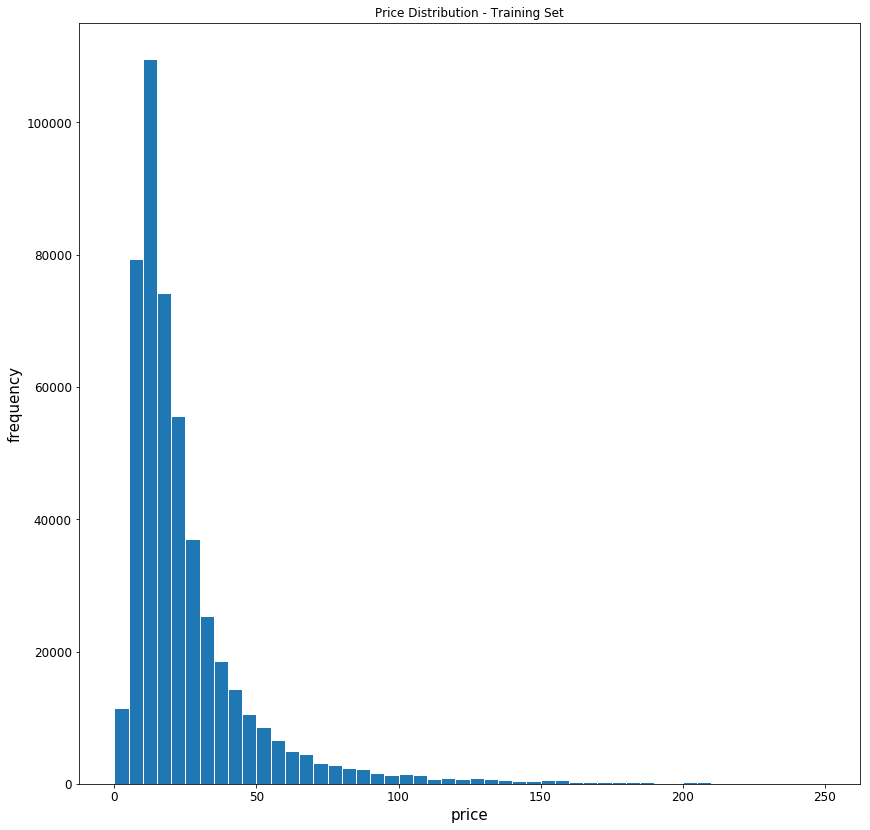

In [36]:
y_pred_rand.plot.hist(bins=50, figsize=(14,14), edgecolor='white',range=[0,250])
plt.xlabel('price', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.tick_params(labelsize=12)
plt.title('Price Distribution - Training Set', fontsize=12)
plt.show()

## Tf-Idf

In [37]:
stop = set(stopwords.words('english'))
def tokenize(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[^A-Za-z0-9]+')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens if len(w)>=3]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)

In [38]:
temp.shape

(1481657, 15)

In [39]:
%%time
vect = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfidf_item_dscp = vect.fit_transform(temp['item_description'])

CPU times: user 11min 21s, sys: 2.52 s, total: 11min 23s
Wall time: 22min 29s


In [40]:
tfidf_item_dscp

<1481657x151371 sparse matrix of type '<class 'numpy.float64'>'
	with 20074078 stored elements in Compressed Sparse Row format>

In [41]:
new_cols1 = vect.get_feature_names()

In [42]:
%%time
vect1 = TfidfVectorizer(tokenizer=tokenize, stop_words='english')
tfidf_name = vect1.fit_transform(temp['name'])

CPU times: user 5min 57s, sys: 750 ms, total: 5min 58s
Wall time: 10min 28s


In [43]:
tfidf_name

<1481657x101351 sparse matrix of type '<class 'numpy.float64'>'
	with 5478208 stored elements in Compressed Sparse Row format>

In [44]:
df_t = temp[['pricemean_brand_name','pricemean_main_cat','pricemean_subcat_1','pricemean_subcat_2','pricemean_item_condition_id']]

In [45]:
df_t['shipping1'] = temp['shipping']

/home/ajetias129/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [46]:
from scipy.sparse import hstack

In [47]:
sparse_tfidf = hstack([tfidf_item_dscp,tfidf_name])

In [48]:
sparse_tfidf

<1481657x252722 sparse matrix of type '<class 'numpy.float64'>'
	with 25552286 stored elements in COOrdinate format>

In [49]:
combined = hstack([sparse_tfidf,df_t])

In [50]:
combined

<1481657x252728 sparse matrix of type '<class 'numpy.float64'>'
	with 33623355 stored elements in COOrdinate format>

In [51]:
from sklearn.feature_extraction import stop_words
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import re

In [52]:
stop = set(stopwords.words('english'))
def tokenizeW(text):
    """
    sent_tokenize(): segment text into sentences
    word_tokenize(): break sentences into words
    """
    try: 
        regex = re.compile('[^A-Za-z0-9]+')
        text = regex.sub(" ", text) # remove punctuation
        
        tokens_ = [word_tokenize(s) for s in sent_tokenize(text)]
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stop, tokens))
        filtered_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        filtered_tokens = [w.lower() for w in filtered_tokens]
        
        return filtered_tokens
            
    except TypeError as e: print(text,e)

In [53]:
tok_item_descp = df['item_description'].map(tokenizeW).tolist()

In [54]:
tok_item_name = df['name'].map(tokenizeW).tolist()

In [55]:
import gensim
from gensim.models import KeyedVectors

In [56]:
#train
w2v_modelD=gensim.models.Word2Vec(tok_item_descp,min_count=1,size=75, workers=8)

In [57]:
w2v_modelN=gensim.models.Word2Vec(tok_item_name,min_count=1,size=75, workers=8)

In [58]:
w2v_modelD.save('w2v_modelDescp')

In [59]:
w2v_modelN.save('w2v_modelName')

In [60]:
#train
model1 = gensim.models.Word2Vec.load('w2v_modelDescp') 

In [61]:
model2 = gensim.models.Word2Vec.load('w2v_modelName') 

In [62]:
d1 = df_t.copy()

In [63]:
d1.head()

,pricemean_brand_name,pricemean_main_cat,pricemean_subcat_1,pricemean_subcat_2,pricemean_item_condition_id,shipping1
0,21.133446,34.708614,18.999442,18.352495,26.540789,1
1,45.021277,35.173922,87.887754,42.913900,26.540789,0
2,15.047109,28.885554,18.237514,15.659676,26.486967,1
3,21.133446,24.536599,21.566301,22.185020,26.486967,1
4,21.133446,28.885554,27.501571,25.587509,26.486967,0


In [64]:
%%time
lisD =()
counter = 0
for sent in tok_item_descp:
    x = 0
    counter = counter + 1
    if counter == 120000:
        print(counter)
        counter = 0
    for w in sent:
        x = x +  model1.wv[w].sum()
    lisD = np.append(lisD,x)

120000
120000
120000
120000
120000
120000
120000
120000
120000
120000
120000
120000
CPU times: user 39min 25s, sys: 43.6 ms, total: 39min 25s
Wall time: 51min 8s


In [65]:
se = pd.Series(lisD)

In [66]:
d1['descp_w2v'] = se.values

In [67]:
%%time
lisN =()
counter = 0
for sent in tok_item_name:
    x = 0
    counter = counter + 1
    if counter == 120000:
        print(counter)
        counter = 0
    for w in sent:
        x = x +  model2.wv[w].sum()
    lisN = np.append(lisN,x)

120000
120000
120000
120000
120000
120000
120000
120000
120000
120000
120000
120000
CPU times: user 36min 48s, sys: 61.9 ms, total: 36min 48s
Wall time: 45min 52s


In [68]:
se1 = pd.Series(lisN)

In [69]:
d1['name_w2v'] = se1.values

In [70]:
d1.head()

,pricemean_brand_name,pricemean_main_cat,pricemean_subcat_1,pricemean_subcat_2,pricemean_item_condition_id,shipping1,descp_w2v,name_w2v
0,21.133446,34.708614,18.999442,18.352495,26.540789,1,0.003458,32.637646
1,45.021277,35.173922,87.887754,42.913900,26.540789,0,69.960383,23.560734
2,15.047109,28.885554,18.237514,15.659676,26.486967,1,-25.949450,5.960648
3,21.133446,24.536599,21.566301,22.185020,26.486967,1,22.794672,15.238658
4,21.133446,28.885554,27.501571,25.587509,26.486967,0,53.119842,34.053709


In [71]:
x_train_T, x_test_T, y_train_T, y_test_T = train_test_split(combined, y, test_size=0.30, random_state=42)

In [72]:
x_train_W, x_test_W, y_train_W, y_test_W = train_test_split(d1, y, test_size=0.30, random_state=42)

In [73]:
x_train_Nt, x_test_Nt, y_train_Nt, y_test_Nt = train_test_split(df_t, y, test_size=0.30, random_state=42)

## Linear Regression

### LR Using Word2Vec

In [74]:
from sklearn import linear_model

In [75]:
Tfidf_LR = linear_model.LinearRegression(n_jobs=-1)

In [76]:
%%time
Tfidf_LR.fit(x_train_W,y_train_W)

CPU times: user 520 ms, sys: 429 ms, total: 949 ms
Wall time: 1.82 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [77]:
y_predLT = Tfidf_LR.predict(x_test_W)

In [78]:
rmsle(y_test_T, y_predLT)

/home/ajetias129/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until


0.65495676568424499

In [79]:
symm_mean_absolute_percentage_error(y_test_T, y_predLT)

50.617166736977794

In [80]:
mean_absolute_percentage_error(y_test_T,y_predLT)

76.53866072999116

### LR using non text features

In [81]:
Nt_LR = linear_model.LinearRegression(n_jobs=-1)

In [82]:
%%time
Nt_LR.fit(x_train_Nt,y_train_Nt)

CPU times: user 322 ms, sys: 225 ms, total: 546 ms
Wall time: 524 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [83]:
y_predLnT = Nt_LR.predict(x_test_Nt)

In [84]:
rmsle(y_test_Nt, y_predLnT)

/home/ajetias129/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until


0.6542190585799218

In [85]:
symm_mean_absolute_percentage_error(y_test_Nt, y_predLnT)

50.554284528804736

In [86]:
mean_absolute_percentage_error(y_test_Nt,y_predLnT)

76.3281452150147

### LR using TfIdf

In [87]:
combined_LR = linear_model.LinearRegression(n_jobs=-1)

In [88]:
%%time
combined_LR.fit(x_train_T,y_train_T)

CPU times: user 1h 1min 59s, sys: 38min 6s, total: 1h 40min 5s
Wall time: 1h 15min 56s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [89]:
y_predLT = combined_LR.predict(x_test_T)

In [90]:
rmsle(y_test_T, y_predLT)

/home/ajetias129/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log1p
  This is separate from the ipykernel package so we can avoid doing imports until


0.7167646486245024

In [91]:
symm_mean_absolute_percentage_error(y_test_T, y_predLT)

55.7709145999113

In [92]:
mean_absolute_percentage_error(y_test_T,y_predLT)

75.35593213418356

## Random Forests

In [93]:
from sklearn.ensemble import RandomForestRegressor

### RF using Word2Vec

In [94]:
W_Rf = RandomForestRegressor(max_depth=15, random_state=42,n_jobs=-1)

In [95]:
%%time
W_Rf.fit(x_train_W,y_train_W)

CPU times: user 1min 38s, sys: 0 ns, total: 1min 38s
Wall time: 35.6 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [96]:
y_predRf_W = W_Rf.predict(x_test_W)

In [97]:
rmsle(y_test_W, y_predRf_W)

0.58294109509526926

In [98]:
symm_mean_absolute_percentage_error(y_test_W, y_predRf_W)

44.87405190897382

In [99]:
mean_absolute_percentage_error(y_test_W,y_predRf_W)

64.94846616084615

In [100]:
W_Rf = RandomForestRegressor(max_depth=15, random_state=42,n_jobs=-1)

In [101]:
%%time
W_Rf.fit(x_train_W,y_train_W)

CPU times: user 1min 39s, sys: 0 ns, total: 1min 39s
Wall time: 35.6 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [102]:
y_predRf_W = W_Rf.predict(x_test_W)

In [103]:
rmsle(y_test_W, y_predRf_W)

0.58294109509526926

In [104]:
symm_mean_absolute_percentage_error(y_test_W, y_predRf_W)

44.87405190897382

In [105]:
mean_absolute_percentage_error(y_test_W,y_predRf_W)

64.94846616084615

### Random Forests using Tf-Idf

In [106]:
T_Rf = RandomForestRegressor(max_depth=15, random_state=42,n_jobs=-1)

In [107]:
%%time
T_Rf.fit(x_train_T,y_train_T)

CPU times: user 1h 4min 58s, sys: 0 ns, total: 1h 4min 58s
Wall time: 22min 31s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [108]:
y_predRf_T = T_Rf.predict(x_test_T)

In [109]:
rmsle(y_test_T, y_predRf_T)

0.60565792206271252

In [110]:
symm_mean_absolute_percentage_error(y_test_T, y_predRf_T)

47.144996894838094

In [111]:
mean_absolute_percentage_error(y_test_T,y_predRf_T)

69.59506906053538

### Hyper parameter Tuning

In [112]:
from sklearn.model_selection import RandomizedSearchCV

In [113]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [114]:
print(random_grid)

{'bootstrap': [True, False], 'min_samples_split': [2, 5, 10], 'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
%%time
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rft = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rft, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=20, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train_T, y_train_T)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] bootstrap=True, min_samples_split=5, n_estimators=311, max_depth=30, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, min_samples_split=5, n_estimators=311, max_depth=30, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, min_samples_split=5, n_estimators=311, max_depth=30, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, min_samples_split=5, n_estimators=2000, max_depth=10, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, min_samples_split=5, n_estimators=2000, max_depth=10, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=True, min_samples_split=5, n_estimators=2000, max_depth=10, max_features=sqrt, min_samples_leaf=1 
[CV] bootstrap=False, min_samples_split=5, n_estimators=1155, max_depth=10, max_features=sqrt, min_samples_leaf=2 
[CV] bootstrap=False, min_samples_split=5, n_estimators=1155, max_depth=10, max_features=sqrt, min_samples_leaf=2 
[CV]  bootstrap=True, min_

[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 94.0min


[CV]  bootstrap=True, min_samples_split=5, n_estimators=311, max_depth=30, max_features=sqrt, min_samples_leaf=1, score=0.123672, total=91.6min
[CV] bootstrap=False, min_samples_split=2, n_estimators=2000, max_depth=30, max_features=auto, min_samples_leaf=4 


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 94.4min


[CV]  bootstrap=True, min_samples_split=5, n_estimators=311, max_depth=30, max_features=sqrt, min_samples_leaf=1, score=0.117639, total=92.0min
[CV] bootstrap=False, min_samples_split=2, n_estimators=2000, max_depth=30, max_features=auto, min_samples_leaf=4 


[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 94.8min


[CV]  bootstrap=False, min_samples_split=5, n_estimators=1155, max_depth=10, max_features=sqrt, min_samples_leaf=2, score=0.046146, total=140.4min
[CV] bootstrap=False, min_samples_split=2, n_estimators=2000, max_depth=30, max_features=auto, min_samples_leaf=4 


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 148.1min


[CV]  bootstrap=False, min_samples_split=5, n_estimators=1155, max_depth=10, max_features=sqrt, min_samples_leaf=2, score=0.044858, total=141.9min
[CV] bootstrap=True, min_samples_split=2, n_estimators=1577, max_depth=10, max_features=sqrt, min_samples_leaf=4 


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 149.8min


[CV]  bootstrap=True, min_samples_split=5, n_estimators=2000, max_depth=10, max_features=sqrt, min_samples_leaf=1, score=0.046173, total=166.4min
[CV] bootstrap=True, min_samples_split=2, n_estimators=1577, max_depth=10, max_features=sqrt, min_samples_leaf=4 


[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 180.4min


[CV]  bootstrap=True, min_samples_split=5, n_estimators=2000, max_depth=10, max_features=sqrt, min_samples_leaf=1, score=0.045801, total=166.9min
[CV] bootstrap=True, min_samples_split=2, n_estimators=1577, max_depth=10, max_features=sqrt, min_samples_leaf=4 


[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 181.1min


[CV]  bootstrap=True, min_samples_split=5, n_estimators=2000, max_depth=10, max_features=sqrt, min_samples_leaf=1, score=0.045261, total=167.8min
[CV] bootstrap=False, min_samples_split=5, n_estimators=733, max_depth=30, max_features=sqrt, min_samples_leaf=4 


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 181.8min


[CV]  bootstrap=False, min_samples_split=5, n_estimators=1155, max_depth=10, max_features=sqrt, min_samples_leaf=2, score=0.045282, total=140.7min


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 242.6min


[CV] bootstrap=False, min_samples_split=5, n_estimators=733, max_depth=30, max_features=sqrt, min_samples_leaf=4 
[CV]  bootstrap=True, min_samples_split=2, n_estimators=1577, max_depth=10, max_features=sqrt, min_samples_leaf=4, score=0.043660, total=130.9min
[CV] bootstrap=False, min_samples_split=5, n_estimators=733, max_depth=30, max_features=sqrt, min_samples_leaf=4 


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 291.1min


[CV]  bootstrap=True, min_samples_split=2, n_estimators=1577, max_depth=10, max_features=sqrt, min_samples_leaf=4, score=0.046447, total=131.8min
[CV] bootstrap=False, min_samples_split=5, n_estimators=944, max_depth=100, max_features=sqrt, min_samples_leaf=2 


[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 322.8min


[CV]  bootstrap=True, min_samples_split=2, n_estimators=1577, max_depth=10, max_features=sqrt, min_samples_leaf=4, score=0.046006, total=131.3min
[CV] bootstrap=False, min_samples_split=5, n_estimators=944, max_depth=100, max_features=sqrt, min_samples_leaf=2 


[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 323.2min


In [ ]:
rf_random.best_params_

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('RMSLE = {0.4f} '.format(rmsle(test_features, test_labels)))
    print('MAPE = {0.4f} '.format(mean_absolute_percentage_error(test_features, test_labels)))
    print('SMAPE = {0.4f} '.format(symm_mean_absolute_percentage_error(test_features, test_labels)))
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train_T, y_train_T)
base_accuracy = evaluate(base_model, x_test_T, y_test_T)

In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test_T, y_test_T)

## XgBoost

### XbBoost using Word2Vec

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics  
from sklearn.grid_search import GridSearchCV  

In [ ]:
data_train = xgb.DMatrix(x_train_W, label=y_train_W)
data_valid = xgb.DMatrix(x_test_W, label=y_test_W)

 
watchlist = [(data_train, 'train'), (data_valid, 'test')]

xgb_params = {'min_child_weight': 20,
              'eta': 0.013,
              'colsample_bytree': 0.45,
              'max_depth': 16,
            'subsample': 0.88,
              'lambda': 2.07,
              
              'booster' :
              'gbtree',
              'silent': 1,
            'eval_metric': 'rmse',
              'objective': 'reg:linear'}

In [ ]:
%%time
xgb_W = xgb.train(xgb_params, data_train, 2000, watchlist, early_stopping_rounds=20, verbose_eval=50)

In [ ]:
%%time
data_test = xgb.DMatrix(x_test_W)
y_predXg_W = xgb_W.predict(data_test)

In [ ]:
rmsle(y_test_W, y_predXg_W)

In [ ]:
symm_mean_absolute_percentage_error(y_test_W, y_predXg_W)

In [ ]:
mean_absolute_percentage_error(y_test_W,y_predXg_W)

### XgBoost using Tf-Idf

In [ ]:
data_train1 = xgb.DMatrix(x_train_T, label=y_train_T)
data_valid1 = xgb.DMatrix(x_test_T, label=y_test_T)

 
watchlist = [(data_train1, 'train'), (data_valid1, 'test')]

xgb_params = {'min_child_weight': 20,
              'eta': 0.013,
              'colsample_bytree': 0.45,
              'max_depth': 16,
            'subsample': 0.88,
              'lambda': 2.07,
              
              'booster' :
              'gbtree',
              'silent': 1,
            'eval_metric': 'rmse',
              'objective': 'reg:linear'}

In [ ]:
%%time
xgb_T = xgb.train(xgb_params, data_train1, 2000, watchlist, early_stopping_rounds=20, verbose_eval=50)

In [ ]:
%%time
data_test1 = xgb.DMatrix(x_test_T)
y_predXg_T = xgb_T.predict(data_test1)

In [ ]:
rmsle(y_test_T, y_predXg_T)

In [ ]:
symm_mean_absolute_percentage_error(y_test_T, y_predXg_T)

In [ ]:
mean_absolute_percentage_error(y_test_T,y_predXg_T)

### XgBoost Hyper Parameter tuning